In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
file_path = "/content/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_df = pd.read_csv(file_path, names=column_names)

In [3]:
print("\nDataset Info:")
print(iris_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
print("\nFirst 5 Rows:")
print(iris_df.head())


First 5 Rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
print("\nDescriptive Statistics:")
print(iris_df.describe())


Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<Figure size 1000x600 with 0 Axes>

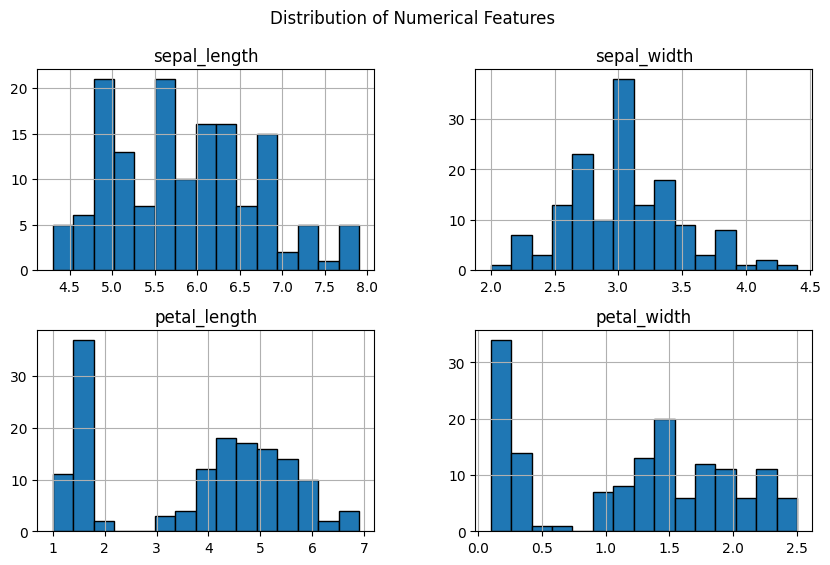

In [6]:
plt.figure(figsize=(10, 6))
iris_df.hist(bins=15, edgecolor='black', figsize=(10,6))
plt.suptitle("Distribution of Numerical Features")
plt.show()

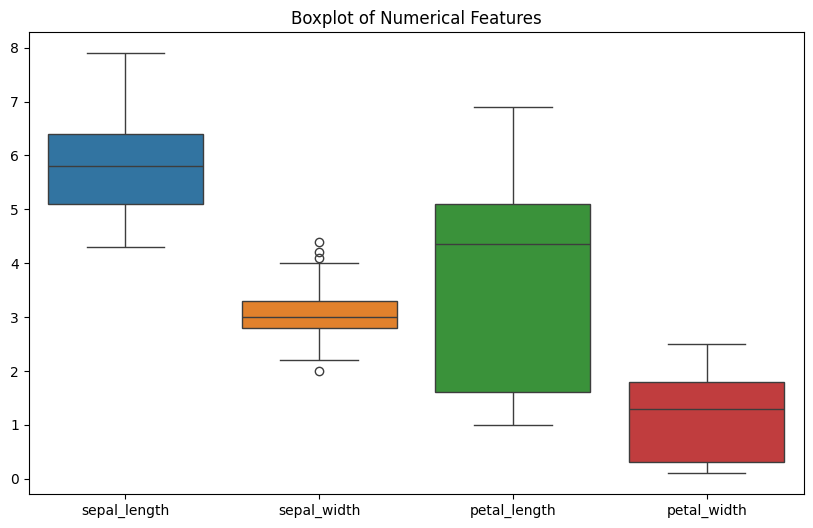

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.drop(columns=['species']))
plt.title("Boxplot of Numerical Features")
plt.show()

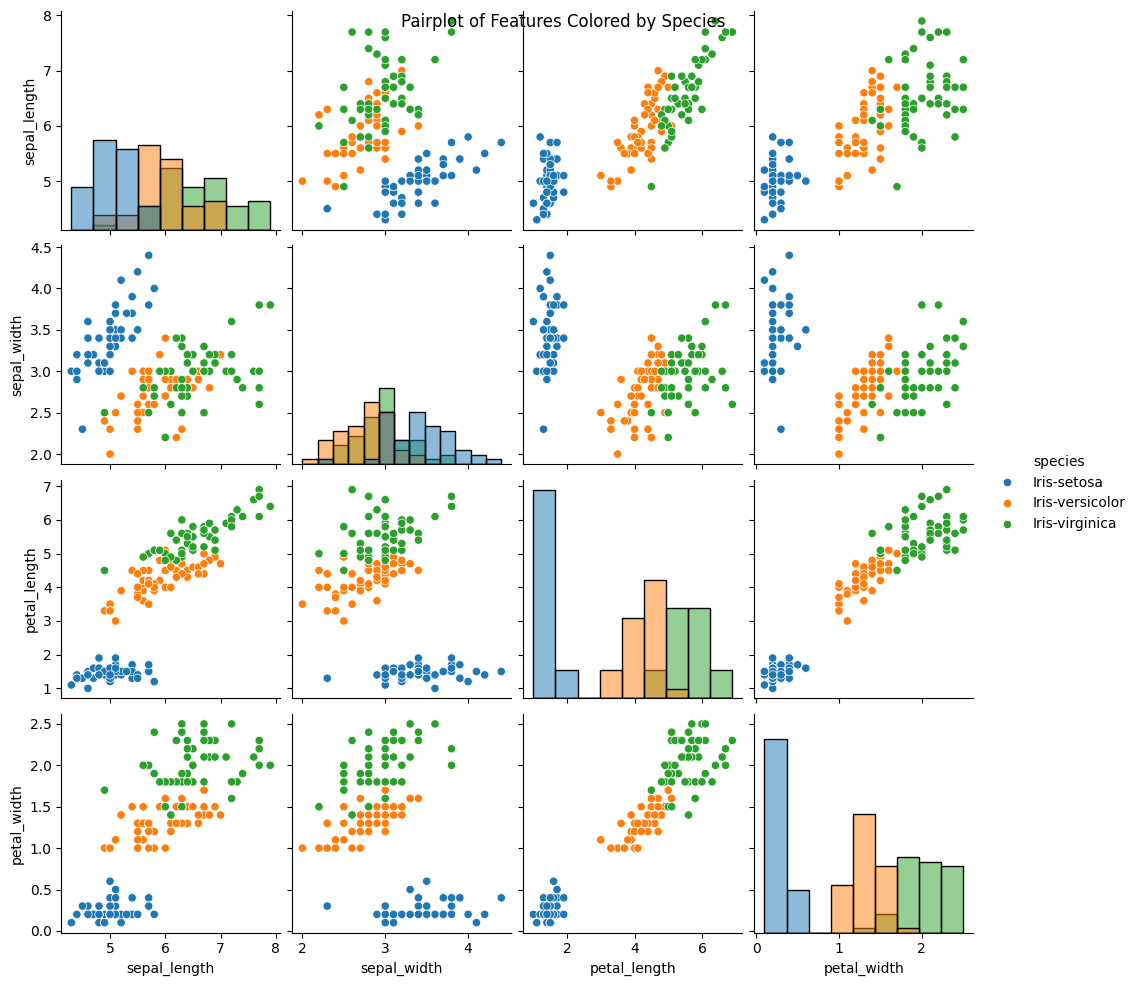

In [8]:
sns.pairplot(iris_df, hue="species", diag_kind="hist")
plt.suptitle("Pairplot of Features Colored by Species")
plt.show()

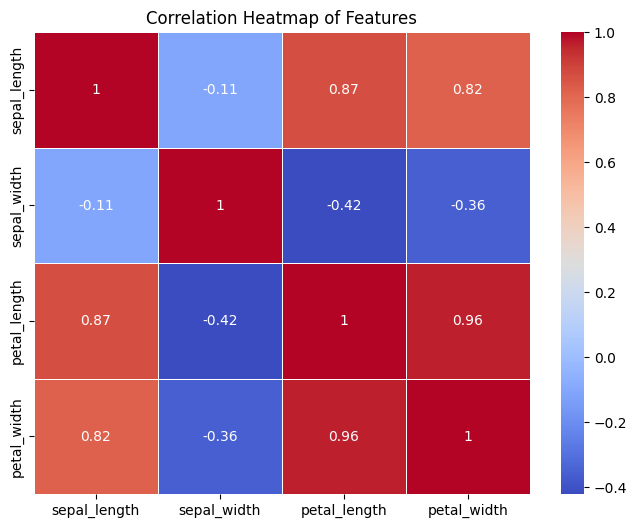

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop(columns=['species']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [10]:
correlation_matrix = iris_df.drop(columns=['species']).corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [11]:
setosa_petal = iris_df[iris_df['species'] == 'Iris-setosa']['petal_length']
versicolor_petal = iris_df[iris_df['species'] == 'Iris-versicolor']['petal_length']
virginica_petal = iris_df[iris_df['species'] == 'Iris-virginica']['petal_length']

anova_stat, p_value = stats.f_oneway(setosa_petal, versicolor_petal, virginica_petal)
print(f"\nANOVA Test for Petal Length Differences:\nStatistic: {anova_stat:.3f}, P-Value: {p_value:.3e}")


ANOVA Test for Petal Length Differences:
Statistic: 1179.034, P-Value: 3.052e-91


In [12]:
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])

In [13]:
X = iris_df.drop(columns=['species'])
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))





Model Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
